# Classification Project 

The main goal of this project is to create a classiication model and get the highest F1.
The F1 score is a measure of a model's accuracy that considers both precision and recall, making it a balanced metric for classification problems, especially when you have imbalanced classes.

# Step 1: Import Libraries

In [612]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import json


from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Step 2: Load Data

In [613]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")  # will be used only for final submission step

In [614]:
X_train.head(2)

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race
0,1847,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white
1,2905,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white


In [615]:
X_train.columns

Index(['Unnamed: 0', 'Education', 'JoiningYear', 'City', 'PaymentTier', 'Age',
       'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'id', 'Race'],
      dtype='object')

In [616]:
# Drop the 'Unnamed: 0' column
X_train.drop('Unnamed: 0', axis=1, inplace=True)

# Set the 'id' column as the index of the dataframe
X_train.set_index('id', inplace=True)

# View the new data frame
X_train.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
1847,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,white
2905,Bachelors,2012,Bangalore,3,28.0,Male,No,4,white


In [617]:
X_test.head(2)

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race
0,911,Bachelors,2014,Bangalore,3,25.0,Female,No,2,911,white
1,2235,Bachelors,2016,Bangalore,3,28.0,Female,No,5,2235,white


In [618]:
# Drop the 'Unnamed: 0' column
X_test.drop('Unnamed: 0', axis=1, inplace=True)

# Set the 'id' column as the index of the dataframe
X_test.set_index('id', inplace=True)

# View the new data frame
X_test.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
911,Bachelors,2014,Bangalore,3,25.0,Female,No,2,white
2235,Bachelors,2016,Bangalore,3,28.0,Female,No,5,white


In [619]:
y_train.head(2)

,Unnamed: 0,LeaveOrNot
0,1847,0
1,2905,0


In [620]:
# Set the 'id' column as the index of the dataframe
y_train.set_index('Unnamed: 0', inplace=True)

# View the new data frame
y_train.head(2)

,LeaveOrNot
Unnamed: 0,
1847,0
2905,0


In [621]:
# y_train.info()

In [622]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3722 entries, 1847 to 2575
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  3722 non-null   object 
 1   JoiningYear                3722 non-null   int64  
 2   City                       3722 non-null   object 
 3   PaymentTier                3722 non-null   int64  
 4   Age                        3720 non-null   float64
 5   Gender                     3720 non-null   object 
 6   EverBenched                3722 non-null   object 
 7   ExperienceInCurrentDomain  3722 non-null   int64  
 8   Race                       3722 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 290.8+ KB


In [623]:
X_train.shape

(3722, 9)

In [624]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3722 entries, 1847 to 2575
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LeaveOrNot  3722 non-null   int64
dtypes: int64(1)
memory usage: 58.2 KB


In [625]:
y_train.shape

(3722, 1)

Check for any missing values

In [626]:
X_train.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          2
Gender                       2
EverBenched                  0
ExperienceInCurrentDomain    0
Race                         0
dtype: int64

In [627]:
y_train.isnull().sum()

LeaveOrNot    0
dtype: int64

Check for imbalanced data

In [628]:
y_train['LeaveOrNot'].value_counts()

0    2415
1    1307
Name: LeaveOrNot, dtype: int64

In [629]:
X_test.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
Race                         0
dtype: int64

Examine the rows with the missing values:

In [630]:
X_train[X_train.isna().any(axis=1)]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
0,Bachelors,2017,Bangalore,3,NaN,NaN,No,0,white
1,Bachelors,2013,Pune,1,NaN,NaN,No,3,white


In [631]:
[(col, X_train[col].unique()) for col in X_train.columns]

[('Education', array(['Bachelors', 'PHD', 'Masters'], dtype=object)),
 ('JoiningYear',
  array([2016, 2012, 2015, 2017, 2014, 2013, 2018], dtype=int64)),
 ('City', array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)),
 ('PaymentTier', array([3, 2, 1], dtype=int64)),
 ('Age',
  array([27., 28., 26., 29., 24., 40., 23., 42., 37., 35., 30., 33., 32.,
         39., 41., 31., 34., 25., 36., 38., 43., nan])),
 ('Gender', array(['Male', 'Female', nan], dtype=object)),
 ('EverBenched', array(['Yes', 'No'], dtype=object)),
 ('ExperienceInCurrentDomain', array([4, 2, 1, 0, 5, 3, 6, 7], dtype=int64)),
 ('Race', array(['white', 'black', 'yellow', 'red'], dtype=object))]

Age and gender statistics

In [632]:
X_train['Age'].mean()

30.928763440860216

In [633]:
# Consider imbalanced data
X_train['Gender'].value_counts()

Male      2218
Female    1502
Name: Gender, dtype: int64

In [634]:
# Impute missing 'Age' values with the mean age
# X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)

In [635]:
# Impute missing 'Gender' values with the mode (most frequent category)
# X_train['Gender'].fillna(X_train['Gender'].mode()[0], inplace=True)
# X_train['Gender'].value_counts()

In [636]:
# [(col, X_train[col].unique()) for col in X_train.columns]

# Step 3: Split Data

In [637]:
X_train_tts, X_test_tts, y_train_tts, y_test_tts = tts(X_train, y_train, test_size=0.5, random_state=123)

# Step 4: Define Column Transformer

In [638]:
numerical_cols = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
categorical_cols = ['Education', 'City', 'Gender', 'EverBenched', 'Race']


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)  
    ])


# Step 5: Customize Models and Hyperparameters


In [639]:
# Define your customized RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
lg = LogisticRegression(random_state=123) 

# Models with penalizing for imbalanced data
rf_penalize = RandomForestClassifier(random_state=123, class_weight='balanced')
lg_penalize = LogisticRegression(random_state=123, class_weight='balanced')

In [640]:
# Hyperparameter grid (adjusted for use with pipeline)
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__min_samples_leaf': [10, 25, 50],
    'classifier__max_depth': [5, 10, 20]
    # 'classifier__criterion': ['gini', 'entropy']
}

In [641]:
# Grid search
lg_param_grid = {'classifier__penalty': ['l1', 'l2'], 
                 'classifier__C': [0.001, 0.01, 1], 
                 'classifier__tol': [0.0001, 0.001], 
                 'classifier__solver': ['liblinear'],
                 'classifier__max_iter': [500]}

# Step 6: Create a Pipeline

In [642]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Step 6: Train the Model

In [643]:
# GridSearchCV with the pipeline
model_gs = GridSearchCV(estimator=pipeline, param_grid=rf_param_grid, cv=10, scoring='f1')

# Fit GridSearchCV 
model_gs.fit(X_train, y_train.values.ravel())
# pipeline.fit(X_train_tts, y_train_tts.values.ravel())

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['JoiningYear',
                                                                          'PaymentTier',
                                                                          'Age',
                                                                          'ExperienceInCurrentDomain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Education',
                                                                          'City',
                                                                          'Gender',
                                                                          'EverBenched',
                                                                          'Race'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=123))]),
             param_grid={'classifier__max_depth': [5, 10, 20],
                         'classifier__min_samples_leaf': [10, 25, 50],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='f1')

In [644]:
# Output the best parameters
print("Best Parameters:", model_gs.best_params_)

# Define the best estimator
best_model = model_gs.best_estimator_

best_model.classes_

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 50}


array([0, 1], dtype=int64)

The following is only relevant for tree models

In [661]:
# Fit the preprocessor on your training data
# Note: Use a copy of your training data to avoid transforming it unintentionally
preprocessor.fit(X_train.copy())

# Function to get feature names from one-hot encoded columns
def get_feature_names(column_transformer, input_features):
    """Get feature names from a ColumnTransformer with transformers containing OneHotEncoders."""
    new_feature_names = []
    for transformer_in_columns in column_transformer.transformers_[:-1]: # Last one is 'remainder'
        transformer = transformer_in_columns[1]
        col_names = transformer_in_columns[2]

        if hasattr(transformer, 'get_feature_names_out'):
            # If it's an OneHotEncoder, use get_feature_names_out
            names = transformer.get_feature_names_out(input_features=col_names)
        else:
            # Otherwise, we assume the feature names stay the same
            names = col_names

        new_feature_names.extend(names)

    return new_feature_names

# Get the transformed feature names
transformed_feature_names = get_feature_names(preprocessor, X_train.columns)

transformed_feature_names

['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

In [662]:
# Ensure your classifier is RandomForest or a similar model that supports feature_importances_
classifier = best_model.named_steps['classifier']
if hasattr(classifier, 'feature_importances_'):
    importances = classifier.feature_importances_

    feature_importances = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': importances})
    feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
    print(feature_importances)
else:
    print("The classifier does not have feature importances.")

ValueError: arrays must all be same length

# Step 6: Evaluate the Model

In [646]:
predictions = best_model.predict(X_test_tts)
print(classification_report(y_test_tts, predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1209
           1       0.88      0.65      0.75       652

    accuracy                           0.85      1861
   macro avg       0.86      0.80      0.82      1861
weighted avg       0.85      0.85      0.84      1861



In [647]:
the_f1 = f1_score(y_test_tts, predictions)
print(f"The f1 on the test set is : {the_f1}")

The f1 on the test set is : 0.7469026548672567


Text(33.0, 0.5, 'Actual')

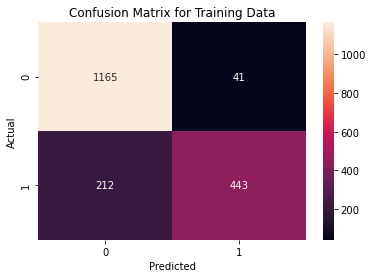

In [648]:
# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train_tts, best_model.predict(X_train_tts))
sns.heatmap(conf_matrix_train, annot=True, fmt='g')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

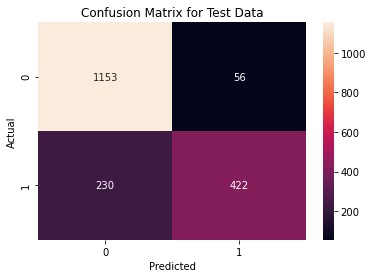

In [649]:
# Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test_tts, predictions)
sns.heatmap(conf_matrix_test, annot=True, fmt='g')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

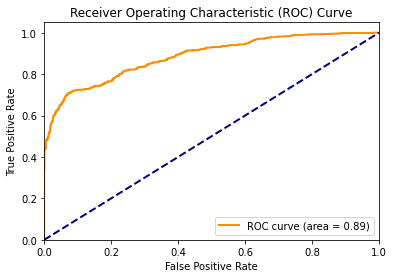

In [650]:
# ROC Curve for Test Data
y_test_proba = best_model.predict_proba(X_test_tts)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_tts, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

SMOTE

In [651]:
# # Creating a SMOTE instance
# smote = SMOTE(random_state=42)

# # Resampling the dataset
# X_train_tts_smote, y_train_tts_smote = smote.fit_resample(X_train_tts_encoded, y_train_tts)

# # Checking the class distribution after SMOTE
# print("Before SMOTE:", Counter(y_train_tts['LeaveOrNot']))
# print("After SMOTE:", Counter(y_train_tts_smote['LeaveOrNot']))

# Submission

In [652]:
# external test dataset should undergo the same preprocessing steps as training dataset
X_test.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
911,Bachelors,2014,Bangalore,3,25.0,Female,No,2,white
2235,Bachelors,2016,Bangalore,3,28.0,Female,No,5,white


In [653]:
X_test.shape

(931, 9)

In [654]:
X_test.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
Race                         0
dtype: int64

Picked the best model to generate predictions:

In [655]:
final_y_pred = best_model.predict(X_test)  # best_model inner pipeline ensurses the preprocessing of X_test
final_y_pred.shape

(931,)

Create a dictionary with the predicted values {id: prediction}

In [656]:
prediction_dict = {id_: pred for id_, pred in zip(X_test.index, final_y_pred)}

# Convert NumPy int64 types to native Python int types in the dictionary (JASON requirement)
prediction_dict_converted = {int(id_): int(pred) for id_, pred in prediction_dict.items()}

 Convert dictionary to JSON File

In [657]:
with open('Daria_non_final_predictions.json', 'w') as f:
    json.dump(prediction_dict_converted, f)